# Método de Newton

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Definamos la función f y sus derivadas.
#f(x, y) := (e^x^2)(y^2) + (2e^y^2)(x^2) + 4xy + (2x^2) + 4x − 2y

In [4]:
def f(x, y):
    return np.exp(x**2) * y**2 + 2*np.exp(y**2) * x**2 + 4*x*y + 2*x**2 + 4*x - 2*y

In [5]:
def grad_f(x, y):
    df_dx = 2*x*np.exp(x**2)*y**2 + 4*np.exp(y**2)*x + 4*y + 4*x + 4
    df_dy = 2*y*np.exp(x**2)*x**2 + 4*np.exp(y**2)*y + 4*x - 2
    return np.array([df_dx, df_dy])

In [6]:
def hess_f(x, y):
    d2f_dx2 = 2*np.exp(x**2)*y**2 + 4*np.exp(x**2)*x**2 + 4*np.exp(y**2)
    d2f_dy2 = 2*np.exp(x**2)*x**2 + 4*np.exp(y**2)
    d2f_dxdy = 4*x*y*np.exp(x**2)
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

In [7]:
#Ahora definamos el método de Newton.

In [8]:
def newton_method(f, grad_f, hess_f, x0, y0, tol=1e-5, max_iter=100):
    x, y = x0, y0
    for i in range(max_iter):
        grad = grad_f(x, y)
        hess = hess_f(x, y)
        if np.linalg.norm(grad) < tol:
            break
        delta = np.linalg.solve(hess, -grad)
        x += delta[0]
        y += delta[1]
    return x, y


In [9]:
#Para encontrar el punto crítico de nuestra función.

In [10]:
x0, y0 = -1.8, 1.3
x_star, y_star = newton_method(f, grad_f, hess_f, x0, y0)

print('Coordenadas del punto crítico: ({:.6f}, {:.6f})'.format(x_star, y_star))

Coordenadas del punto crítico: (-2.809024, 0.000313)


In [11]:
#Grafiquemos la función

C:\Users\ASUS\AppData\Local\Temp\ipykernel_28648\3691417216.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x**2) * y**2 + 2*np.exp(y**2) * x**2 + 4*x*y + 2*x**2 + 4*x - 2*y
C:\Users\ASUS\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


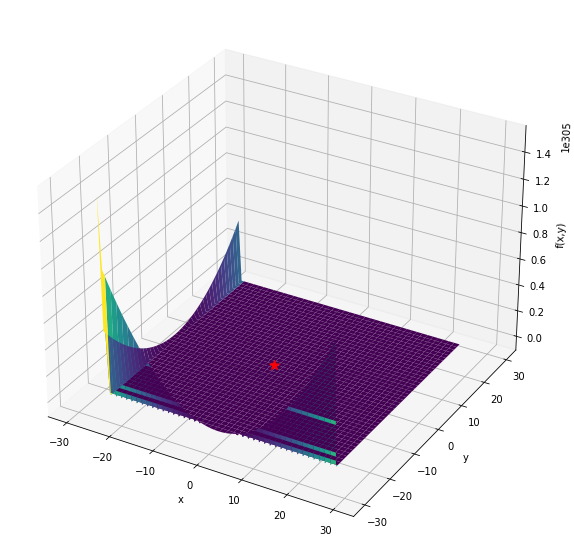

In [12]:
x_vals = np.linspace(-30, 30, 100)
y_vals = np.linspace(-30, 30, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# graficar el punto crítico encontrado
ax.scatter(x_star, y_star, f(x_star, y_star), color='red', s=100, marker='*')

plt.show()